# Week 3: Working with Pandas

Welcome back! Last week we started doing some real data analysis, but we were writing extremely basic functionality by hand. While it's important to be familiar with the language and understand how things like that work, in practice you wouldn't want to have to reimplement a mean-finding function from scratch every time you're starting a new data analysis project.

Enter [Pandas](http://pandas.pydata.org/), the Python Data Analysis library. Pandas is one of the newer additions to the scientific Python ecosystem, but it's already a mature and very powerful tool. If you've worked with R before, or other statistical software, many of the concepts will be familiar to you. Pandas introduces Series (indexed lists) and DataFrames (data organized table-style into rows and columns), and provides a range of functionality built in. So let's get started!

The first thing we do is import the pandas module:

In [1]:
import pandas as pd

## Series

The basic pandas object is a Series. We can create a series from a list, like this:

In [2]:
s = pd.Series([1, 3, 5, 7, 9, 11])

Now look at the series contents:

In [3]:
s

0     1
1     3
2     5
3     7
4     9
5    11
dtype: int64

Notice the two columns above; the first, leftmost column is the index, which is just the same 0 to 5 values you'd expect in a regular list. The righthand column is the actual values the series is storing.

The Series object comes built-in with quite a few basic functions. For example:

In [4]:
print(s.sum())
print(s.mean())
print(s.median())

36
6.0
6.0


We can perform artithmetic operations on a series; the operation will be done element by element, and the result will be another series:

In [5]:
s + 1

0     2
1     4
2     6
3     8
4    10
5    12
dtype: int64

Since the result is a new series, we can assign it to a variable:

In [6]:
double_s = s * 2
print(double_s)

0     2
1     6
2    10
3    14
4    18
5    22
dtype: int64


We can also perform arithmetic *between* series; the results will again be another series:

In [7]:
a = pd.Series([1, 2, 3])
b = pd.Series([2, 4, 8])

In [8]:
a + b

0     3
1     6
2    11
dtype: int64

In [9]:
a - b

0   -1
1   -2
2   -5
dtype: int64

In [10]:
a * b

0     2
1     8
2    24
dtype: int64

In [11]:
a / b

0    0.500
1    0.500
2    0.375
dtype: float64

We can iterate over series in much the same way as lists. 

In [12]:
for x in s:
    print(x, x*x)

1 1
3 9
5 25
7 49
9 81
11 121


We can even use list comprehension, though it gives us a list, not a Series:

In [13]:
[x*x for x in s]

[1, 9, 25, 49, 81, 121]

Let's create a series with the square of values, plus some added random 'noise'.

#### Sidebar: generating random numbers:

To get the noise, we'll use the built-in **random** module, which provides several random number generators. The most basic one, also called **random()**, simply picks a random number with uniform probability from the interval [0,1).

In [14]:
import random

In [15]:
print(random.random()) # Your results will obviously be different.

0.19983315798882462


We can also draw a number from a [normal (Gaussian) distribution](http://en.wikipedia.org/wiki/Normal_distribution), with specified mean and standard deviations:

In [16]:
random.normalvariate(0, 1) # Mean 0 and standard deviation 1

-0.7947422761295387

#### End sidebar

So, let's square the original series and add some random noise; we can use list comprehension, and turn the resulting list immediately into a Series:

In [17]:
s2 = pd.Series([x*x + random.normalvariate(0, 1) for x in s])

### Time series

Pandas was originally designed with financial analysis in mind, so it's no surprise that it has great time series functionality. Instead of just using the default 0, 1, 2... indices, we can index a Series on anything we want -- including datetime objects. 

First, we import the datetime module:

In [18]:
import datetime as dt

Suppose we want a monthly time-series. We first need to create a list of datetime objects representing the beginning of every month, to use as our index:

In [19]:
months = [dt.datetime(2001, x, 1) for x in range(1,13)]

In [20]:
months

[datetime.datetime(2001, 1, 1, 0, 0),
 datetime.datetime(2001, 2, 1, 0, 0),
 datetime.datetime(2001, 3, 1, 0, 0),
 datetime.datetime(2001, 4, 1, 0, 0),
 datetime.datetime(2001, 5, 1, 0, 0),
 datetime.datetime(2001, 6, 1, 0, 0),
 datetime.datetime(2001, 7, 1, 0, 0),
 datetime.datetime(2001, 8, 1, 0, 0),
 datetime.datetime(2001, 9, 1, 0, 0),
 datetime.datetime(2001, 10, 1, 0, 0),
 datetime.datetime(2001, 11, 1, 0, 0),
 datetime.datetime(2001, 12, 1, 0, 0)]

One way to create a series with a custom index is with a dictionary: keys are the index, and values are the values. Here, we create a dictionary associating each of the datetimes with a random value:

In [21]:
time_series = {}
for date in months:
    time_series[date] = random.normalvariate(0,1)

A lesser-known Python trick is that just like list comprehension, there is also dictionary comprehension: creating a dictionary from a known set of keys. We can simplify the above code like this:

In [22]:
time_series = {date: random.normalvariate(0,1) for date in months}

Now that we have a dictionary associating dates with values, we can turn it into a pandas series:

In [23]:
time_series = pd.Series(time_series)

In [24]:
time_series

2001-01-01    0.950951
2001-02-01   -0.593803
2001-03-01   -1.355348
2001-04-01   -0.737526
2001-05-01    1.988995
2001-06-01    0.943925
2001-07-01   -0.702447
2001-08-01    0.879649
2001-09-01   -1.002539
2001-10-01   -0.300570
2001-11-01   -0.013026
2001-12-01    1.254241
dtype: float64

Here's another useful bit of series functionality, that's especually handy for time series. The *cumsum()* function returns a new series, where each value is the cumulative sum of all the previous values. If we wanted to turn our random numbers into a random walk, we could do:

In [25]:
time_series_total = time_series.cumsum()

In [26]:
time_series_total

2001-01-01    0.950951
2001-02-01    0.357147
2001-03-01   -0.998200
2001-04-01   -1.735727
2001-05-01    0.253268
2001-06-01    1.197193
2001-07-01    0.494746
2001-08-01    1.374395
2001-09-01    0.371856
2001-10-01    0.071285
2001-11-01    0.058259
2001-12-01    1.312500
dtype: float64

If you're using the IPython Notebook, pandas can create a quick chart of the time series. If you're not using the Notebook, don't worry about it right now -- we'll go deeper into visualization (including how to do it from IDLE or the command line) next week.

If you're in the IPython notebook, use the following command to prepare for plotting:

In [27]:
%matplotlib inline 

Next, we use the pandas series' built-in *plot()* method to create the chart:

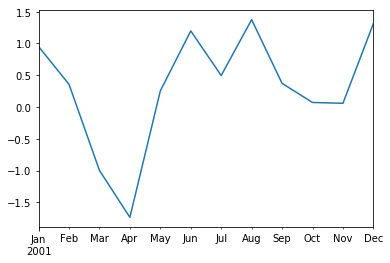

In [28]:
time_series_total.plot()

Instead of making a range of dates by hand, we can have pandas do it for us using the *date_range(...)* function, as follows:

In [29]:
dates = pd.date_range('1/1/2000', periods=120, freq='M')

In [30]:
dates

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2009-03-31', '2009-04-30', '2009-05-31', '2009-06-30',
               '2009-07-31', '2009-08-31', '2009-09-30', '2009-10-31',
               '2009-11-30', '2009-12-31'],
              dtype='datetime64[ns]', length=120, freq='M')

The first date is the starting date; next, *periods* is how many dates to create. Finally, the *freq* is a code for the frequency to create the dates at. 'M' or 'm' indicates monthly; 'D' would be daily, 'min' minute-ly, and more. You can check out the  full pandas documentation for more complicated codes (e.g. quarters, business days, etc): http://pd.pydata.org/pandas-docs/stable/timeseries.html

Notice that by default, pandas puts the dates for a monthly sequence at the *end* of each month.

Let's create two new random walks:

In [31]:
ts1 = pd.Series([random.normalvariate(0,1) for x in range(120)], index=dates)
ts2 = pd.Series([random.normalvariate(0,1) for x in range(120)], index=dates)

ts1 = ts1.cumsum()
ts2 = ts2.cumsum()

We can view the first or last few entries in a series using the *head()* or *tail()* functions:

In [32]:
ts1.head() # First 5 entries

2000-01-31    1.297012
2000-02-29    1.292546
2000-03-31   -0.074833
2000-04-30    0.590302
2000-05-31    1.016296
Freq: M, dtype: float64

In [33]:
ts2.tail() # Last 5 entries

2009-08-31    3.234492
2009-09-30    3.272259
2009-10-31    3.922235
2009-11-30    2.928794
2009-12-31    3.977802
Freq: M, dtype: float64

Pandas series have a built-in *corr(...)* function for finding the correlation between two series:

In [34]:
print(ts1.corr(ts2)) # Defaults to Pearson correlation
print(ts1.corr(ts2, method='spearman')) # Spearman's rank correlation

0.298163001372
0.277706785193


We can also find a series's autocorrelation:

In [35]:
ts1.autocorr()

0.969224967757913

## Dataframes

If you've worked in R, you're already familiar with the general concept of dataframes. You probably know the same concept by different names in other languages and tools too -- it's just data organized into a table, with columns of specific variables and rows of observations. 

Technically, in Pandas, a DataFrame is a composed of Series with a shared index; each Series is a column, and each index value is a row.

We can create a DataFrame from series by creating a dictionary associating each series with a column name, like this:

In [36]:
df = pd.DataFrame({"Column1": ts1, "Column2": ts2})

In [37]:
df

,Column1,Column2
2000-01-31,1.297012,-2.989012
2000-02-29,1.292546,-2.660159
2000-03-31,-0.074833,-2.149480
2000-04-30,0.590302,-0.783816
2000-05-31,1.016296,-0.112741
2000-06-30,1.135825,-0.666777
2000-07-31,-0.573189,0.727667
2000-08-31,-0.043106,0.879684
2000-09-30,0.628661,0.316600
2000-10-31,-0.822078,-0.205947


Viewing the DataFrame may either display the whole thing, or else just a quick summary of the index and the columns, depending on the version of pandas you have and how it's conigured. To view the summary, use the *.info()* method:

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2000-01-31 to 2009-12-31
Freq: M
Data columns (total 2 columns):
Column1    120 non-null float64
Column2    120 non-null float64
dtypes: float64(2)
memory usage: 2.8 KB


The column headers are stored in the *columns* property:

In [39]:
df.columns

Index(['Column1', 'Column2'], dtype='object')

We can quickly see the data types of each column using the *dtypes* property:

In [40]:
df.dtypes

Column1    float64
Column2    float64
dtype: object

And we can see the index using the *index* property:

In [41]:
df.index

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2009-03-31', '2009-04-30', '2009-05-31', '2009-06-30',
               '2009-07-31', '2009-08-31', '2009-09-30', '2009-10-31',
               '2009-11-30', '2009-12-31'],
              dtype='datetime64[ns]', length=120, freq='M')

The index is a datetime, just like it was for the series. Each row is associated with a date.

We can quickly look at the top and bottom rows using the *head()* and *tail()* methods.

In [42]:
df.head()

,Column1,Column2
2000-01-31,1.297012,-2.989012
2000-02-29,1.292546,-2.660159
2000-03-31,-0.074833,-2.149480
2000-04-30,0.590302,-0.783816
2000-05-31,1.016296,-0.112741


In [43]:
df.tail(2) # A number specifies how many rows to include

,Column1,Column2
2009-11-30,-5.818047,2.928794
2009-12-31,-6.839541,3.977802


Using the *corr()* method will produce a correlation table for all the columns in the DataFrame.

In [44]:
df.corr()

,Column1,Column2
Column1,1.000000,0.298163
Column2,0.298163,1.000000


### Selecting columns

There are two ways to access specific columns within the DataFrame. The first is by putting the columns name (in quotation marks) in square brackets:

In [45]:
df["Column1"]

2000-01-31    1.297012
2000-02-29    1.292546
2000-03-31   -0.074833
2000-04-30    0.590302
2000-05-31    1.016296
2000-06-30    1.135825
2000-07-31   -0.573189
2000-08-31   -0.043106
2000-09-30    0.628661
2000-10-31   -0.822078
2000-11-30    1.509841
2000-12-31    1.631578
2001-01-31   -0.830258
2001-02-28   -2.952233
2001-03-31   -2.064013
2001-04-30   -2.207363
2001-05-31   -2.939309
2001-06-30   -4.289903
2001-07-31   -5.581131
2001-08-31   -4.608646
2001-09-30   -4.332965
2001-10-31   -3.699863
2001-11-30   -3.776690
2001-12-31   -3.721790
2002-01-31   -3.229868
2002-02-28   -3.802633
2002-03-31   -4.859274
2002-04-30   -5.278554
2002-05-31   -4.490615
2002-06-30   -4.379438
                ...   
2007-07-31   -5.239488
2007-08-31   -4.565513
2007-09-30   -3.248812
2007-10-31   -1.903302
2007-11-30   -1.132045
2007-12-31   -0.982751
2008-01-31   -0.288165
2008-02-29   -0.928285
2008-03-31   -0.255353
2008-04-30   -1.895454
2008-05-31   -2.750238
2008-06-30   -1.948872
2008-07-31 

If there are no spaces in the column name, we can also reference it as a property:

In [46]:
df.Column2

2000-01-31   -2.989012
2000-02-29   -2.660159
2000-03-31   -2.149480
2000-04-30   -0.783816
2000-05-31   -0.112741
2000-06-30   -0.666777
2000-07-31    0.727667
2000-08-31    0.879684
2000-09-30    0.316600
2000-10-31   -0.205947
2000-11-30   -1.530621
2000-12-31   -2.802325
2001-01-31   -3.733409
2001-02-28   -3.361134
2001-03-31   -4.814470
2001-04-30   -5.396169
2001-05-31   -5.006958
2001-06-30   -5.473868
2001-07-31   -4.732210
2001-08-31   -5.281145
2001-09-30   -4.766603
2001-10-31   -4.321710
2001-11-30   -4.594799
2001-12-31   -4.370417
2002-01-31   -4.982600
2002-02-28   -6.102295
2002-03-31   -6.123092
2002-04-30   -6.108814
2002-05-31   -6.276635
2002-06-30   -4.804329
                ...   
2007-07-31   -1.843835
2007-08-31   -1.876365
2007-09-30   -1.680131
2007-10-31   -1.156531
2007-11-30   -1.809055
2007-12-31   -1.546520
2008-01-31   -0.825959
2008-02-29   -2.298158
2008-03-31   -1.833703
2008-04-30   -2.778453
2008-05-31   -1.746381
2008-06-30    0.100493
2008-07-31 

The square bracket notation is also how we create new columns:

In [47]:
df["New Column"] = 1

In [48]:
df.head()

,Column1,Column2,New Column
2000-01-31,1.297012,-2.989012,1
2000-02-29,1.292546,-2.660159,1
2000-03-31,-0.074833,-2.149480,1
2000-04-30,0.590302,-0.783816,1
2000-05-31,1.016296,-0.112741,1


Notice that since there's a space in the name, we can't reference it as *df.* anything

## Working with real data

Playing with toy data is fine, but to really dive into pandas let's use it to replicate and expand on some of our analysis last week.

We can load a CSV file into a pandas DataFrame using the *read_csv(...)* function. Let's step through and try to load last week's MovieData.csv:

In [49]:
movies = pd.read_csv("MovieData.csv")

CParserError: Error tokenizing data. C error: Expected 1 fields in line 38, saw 2


That's a scary-looking error, but read down to the end. "Error tokenizing data" probably means that there's an issue splitting the data into columns. It turns out that *read_csv* assumes by default that the data is comma-delimited. We need to explicitly give it a separator ('sep') if it's something different, like this:

In [50]:
movies = pd.read_csv("MovieData.csv", sep='\t')

Okay, no errors now! Let's see what it's loaded:

In [51]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3627 entries, 0 to 3626
Data columns (total 6 columns):
Release_Date       3627 non-null object
Movie              3627 non-null object
Distributor        2968 non-null object
Budget             3627 non-null int64
US Gross           3627 non-null object
Worldwide Gross    3627 non-null object
dtypes: int64(1), object(5)
memory usage: 170.1+ KB


In [52]:
movies.columns

Index(['Release_Date', 'Movie', 'Distributor', 'Budget', 'US Gross',
       'Worldwide Gross'],
      dtype='object')

In [53]:
movies.dtypes

Release_Date       object
Movie              object
Distributor        object
Budget              int64
US Gross           object
Worldwide Gross    object
dtype: object

Looks pretty good, up until the end. We've got the correct column names, and a correct-seeming number of values. But we know that Budget, US Gross and Worldwide Gross are all supposed to be numbers; why is it reading them in as objects (which, in cases like this, generally means 'strings', since Pandas doesn't provide an explicit string datatype the way it does for ints and floats).

As you may remember from last week, missing values were actually filled with a text string denoting this. Helpfully, *read_csv* lets you specify one or more 'na_values' which it should read as indicating missing data. To figure out what we should include there, however, we can use the *unique()* method, which returns all the unique values of a Series:

In [54]:
movies["US Gross"].unique()

array(['66439100', '309420425', 'Unknown', ..., '48482', '1338', '181041'], dtype=object)

Ah, see it? It's the word 'Unknown', so let's give that as our N/A Value:

In [55]:
movies = pd.read_csv("MovieData.csv", sep='\t', na_values="Unknown")

In [56]:
movies.dtypes

Release_Date        object
Movie               object
Distributor         object
Budget               int64
US Gross           float64
Worldwide Gross     object
dtype: object

Almost there! US Gross is now a numeric column, but Worldwide Gross isn't. So let's check again:

In [57]:
movies["Worldwide Gross"].unique()

array(['254439100', '960996492', nan, ..., '71644', '240495', 'Unkno'], dtype=object)

It looks like at least one record has 'Unkno' as its value. Luckily, we can pass *na_values* a list of values, and it will treat all of them as indicators of no data.

(Incidentally, to make your code more readable, you can insert line-breaks inside of parentheses, and Python will treat them as the same line)

In [58]:
movies = pd.read_csv("MovieData.csv", sep='\t', 
                         na_values=["Unknown", "Unkno"])

In [59]:
movies.dtypes

Release_Date        object
Movie               object
Distributor         object
Budget               int64
US Gross           float64
Worldwide Gross    float64
dtype: object

There we go!

In [60]:
movies.head()

,Release_Date,Movie,Distributor,Budget,US Gross,Worldwide Gross
0,03/09/12,John Carter,NaN,300000000,66439100.0,254439100.0
1,05/25/07,Pirates of the Caribbean: At World's End,Buena Vista,300000000,309420425.0,960996492.0
2,12/13/13,The Hobbit: There and Back Again,New Line,270000000,NaN,NaN
3,12/14/12,The Hobbit: An Unexpected Journey,New Line,270000000,NaN,NaN
4,11/24/10,Tangled,Buena Vista,260000000,200821936.0,586581936.0


Notice the 'NaN' cells -- NaN stands for Not a Number. If we want, we can replace NaN values with 0s using the *fillna(...)* method:

In [61]:
movies = movies.fillna(0)

(It probably isn't best analytic practice to assume that missing data is just zero, but we'll do it now anyway for demonstration purposes)

In [62]:
movies.tail()

,Release_Date,Movie,Distributor,Budget,US Gross,Worldwide Gross
3622,05/26/06,Cavite,Truly Indie,7000,70071.0,71644.0
3623,01/01/04,The Mongol King,CustomFlix,7000,900.0,0.0
3624,04/04/99,Following,Zeitgeist,6000,48482.0,240495.0
3625,07/13/05,Return to the Land of Wonders,0,5000,1338.0,0.0
3626,08/05/05,My Date With Drew,0,1100,181041.0,0.0


Like before, though, we want to be able to actually work with the dates. We can tell pandas to parse one or more columns as dates when it loads the data, using the *parse_dates* parameter. If we assign a list of column numbers to it, it will attempt to automatically parse those columns as dates:

In [63]:
movies = pd.read_csv("MovieData.csv", sep='\t', 
                         na_values=["Unknown", "Unkno"], parse_dates=[0])

In [64]:
movies.dtypes

Release_Date       datetime64[ns]
Movie                      object
Distributor                object
Budget                      int64
US Gross                  float64
Worldwide Gross           float64
dtype: object

As you can see, the Release_Date column has been read as a datetime object. Now, to check whether it's parsed it correctly:

In [65]:
min(movies["Release_Date"])

Timestamp('1967-01-01 00:00:00')

In [66]:
max(movies.Release_Date)

Timestamp('2066-12-12 00:00:00')

So it looks like the built-in date parser isn't very good at figuring out which dates are in the 20th century, and which are in the 21st. Fortunately, we already solved this problem last week; we can bring in our custom parser, and tell Pandas to use that, using the *date_parser* parameter.

In [67]:
def make_date(date_str):
    '''
    Turn a MM/DD/YY string into a datetime object
    '''
    m, d, y = date_str.split("/")
    m = int(m)
    d = int(d)
    y = int(y)
    if y > 13:
        y += 1900
    else:
        y += 2000
    return dt.datetime(y, m, d)

In [68]:
movies = pd.read_csv("MovieData.csv", sep='\t', na_values=["Unknown", "Unkno"], 
                         parse_dates=[0], date_parser=make_date)

Notice that we're only passing the name of the function, without the usual parentheses. Conceptually, think of this as simply passing the name of our parser function, which the *read_csv(...)* function can call on its own. For each entry, pandas will automatically call the function, and put its return value in the column. (More technically, functions in Python are first-class objects, and can be passed as arguments just like any other data type).

In [69]:
movies = movies.fillna(0)

In [70]:
print(movies.Release_Date.max())
print(movies.Release_Date.min())

2013-12-13 00:00:00
1915-02-08 00:00:00


There, that's better.

I mentioned earlier that we can easily create columns from other columns. Now that we have data, let's look at it again:

In [71]:
movies["Non_US_Gross"] = movies["Worldwide Gross"] - movies["US Gross"]

For each movie, the value of the "Non_US_Gross" will be its Worldwide Gross minus its US Gross. The underscore in the name aren't mandatory, but they let us reference the column like this:

In [72]:
movies.Non_US_Gross.min()

-184925485.0

As you see above, *min()* (and *max()* as well) are built-in series functions, which can be called for columns as well. However, the Non-US Gross shouldn't be negative, since the Worldwide Gross is supposed to be inclusive of US Gross. So we want to take a closer look at those rows to figure out what's going on.

## Subsetting

Just because we have one big dataset doesn't mean we want to work with it all at once. Often --- like right now -- we want to be able to select only a subset of the data. In pandas, we do this by putting the condition we're selecting on in square brackets. For example, if we want only movies where the Non-US Gross is negative, we do:

In [73]:
movies[movies.Non_US_Gross < 0]

,Release_Date,Movie,Distributor,Budget,US Gross,Worldwide Gross,Non_US_Gross
272,1998-11-13,Meet Joe Black,Universal,85000000,44650003.0,0.0,-44650003.0
274,2000-11-22,102 Dalmatians,Buena Vista,85000000,66941559.0,0.0,-66941559.0
280,2012-03-30,Mirror Mirror,0,85000000,19662216.0,0.0,-19662216.0
313,2000-01-01,Fantasia 2000 (IMAX),Buena Vista,80000000,60507228.0,0.0,-60507228.0
321,2000-06-16,Fantasia 2000 (Theatrical Release),Buena Vista,80000000,9103630.0,0.0,-9103630.0
324,1998-12-25,Mighty Joe Young,Buena Vista,80000000,50632037.0,0.0,-50632037.0
339,1997-12-25,The Postman,Warner Bros.,80000000,17650704.0,0.0,-17650704.0
384,1999-07-23,Inspector Gadget,Buena Vista,75000000,97387965.0,0.0,-97387965.0
390,1999-12-17,Anna and the King,20th Century Fox,75000000,39251128.0,0.0,-39251128.0
397,1998-10-23,Soldier,Warner Bros.,75000000,14623082.0,0.0,-14623082.0


It looks like in all these cases, the Non-US Gross is negative because Worldwide Gross is zero. Remember that we replaced missing values with zeroes, which is probably where these come from. Let's double-check this by looking at the max or min values of Non-US Gross when the Worldwide Gross column is zero. As the output above hints, the results of square bracket notation can be treated just like a DataFrame -- which means we can select columns, and it will only return the column values that are within our subset.

In [74]:
movies[movies["Worldwide Gross"]==0]["Non_US_Gross"].max()

0.0

Since Worldwide Gross is supposed to be inclusive of US Gross, a sensible thing to do is to just fill these values with those of their respective US Gross. To do this, we use the subset notation again, but this time with an assignment. Note that for assignments, we put the column first, then the subset.

In [75]:
movies["Worldwide Gross"][movies["Worldwide Gross"]==0] = movies["US Gross"]

//anaconda/envs/data/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


You may see a warning -- similar to the one I got above. It's telling you that it can't tell whether you're operating on a copy of part of the DataFrame, or a subset. Usually you can just ignore this warning, and just make sure that the data copied the way you wanted it to:

In [76]:
movies[movies.Non_US_Gross < 0]

,Release_Date,Movie,Distributor,Budget,US Gross,Worldwide Gross,Non_US_Gross
272,1998-11-13,Meet Joe Black,Universal,85000000,44650003.0,44650003.0,-44650003.0
274,2000-11-22,102 Dalmatians,Buena Vista,85000000,66941559.0,66941559.0,-66941559.0
280,2012-03-30,Mirror Mirror,0,85000000,19662216.0,19662216.0,-19662216.0
313,2000-01-01,Fantasia 2000 (IMAX),Buena Vista,80000000,60507228.0,60507228.0,-60507228.0
321,2000-06-16,Fantasia 2000 (Theatrical Release),Buena Vista,80000000,9103630.0,9103630.0,-9103630.0
324,1998-12-25,Mighty Joe Young,Buena Vista,80000000,50632037.0,50632037.0,-50632037.0
339,1997-12-25,The Postman,Warner Bros.,80000000,17650704.0,17650704.0,-17650704.0
384,1999-07-23,Inspector Gadget,Buena Vista,75000000,97387965.0,97387965.0,-97387965.0
390,1999-12-17,Anna and the King,20th Century Fox,75000000,39251128.0,39251128.0,-39251128.0
397,1998-10-23,Soldier,Warner Bros.,75000000,14623082.0,14623082.0,-14623082.0


Looks good (though we need to update the Non_US_Gross column). Notice that even though we didn't subset the US Gross column as we assigned it, pandas automatically matched up the correct rows.

In [77]:
movies["Non_US_Gross"] = movies["Worldwide Gross"] - movies["US Gross"]

In [78]:
movies.Non_US_Gross.min()

0.0

With that correction in hand, we can continue analyzing the data. For example, let's get the profit for each movie:

In [79]:
movies["Profits"] = movies["Worldwide Gross"] - movies["Budget"]

There are a few standard metrics we want to compute frequently, such as min, max, mean and median. Pandas puts all these handily together with the *describe()* method:

In [80]:
movies.Profits.describe()

count    3.627000e+03
mean     5.414562e+07
std      1.302474e+08
min     -2.700000e+08
25%     -2.891174e+06
50%      9.423500e+06
75%      6.090619e+07
max      2.546919e+09
Name: Profits, dtype: float64

Note that pandas tries to pick the way to display numbers. Here, for example, it decides to use [scientific notation](https://en.wikipedia.org/wiki/Scientific_notation), expressing numbers as multiples of exponents of 10.

Column names are just Python values like anything else, and DataFrame.columns works basically like a list. That means that we can loop over it. For example, suppose we wanted to print the number of unique values in each column:

In [81]:
for column in movies.columns:
    print(column, len(movies[column].unique()))

Release_Date 1715
Movie 3599
Distributor 209
Budget 406
US Gross 3473
Worldwide Gross 3484
Non_US_Gross 2100
Profits 3567


## Grouping

Often, what you care about aren't individual records, but summaries aggregated at some level. For example, you may want to know how many movies were released each year, or whether certain months of the year have more earthquakes than others. 

Pandas uses the Split-Apply-Combine paradigm; we **split** the data into groups, **apply** a certain calculation to each group separately, and **combine** the results back into a new data structure. 

Let's start by getting the annual mean of each numeric column: finding the average US Gross, Worldwide Gross, etc. by year.

First, we need to create a new column to aggregate on -- the Release Year. Since the values of the *Release_Date* column are datetime-like objects, they have a *year* property:

In [82]:
movies.Release_Date[19].year # Some arbitrary row

2005

To create a new column based on another column, with an operation that isn't basic arithmetic, we use the *apply(...)* method. This method takes another function as an input, and applies it (hence the name) to each value in a column or series. The function being applied should take a single value as an input, and produce a similar output which can be assigned to the new series.

In [83]:
def get_year(date):
    return date.year

In [84]:
movies["Year"] = movies.Release_Date.apply(get_year)

In fact, we don't even have to define an entire function; Python allows us to use the **lambda** keyword to create a simple one-line function directly inside the *apply(...)* parentheses (you may have encountered this concept as anonymous functions in other languages). 

We could simplify the lines above to:

In [85]:
movies["Year"] = movies.Release_Date.apply(lambda x: x.year)

In [86]:
print(movies.Year.min())
print(movies.Year.max())

1915
2013


Now that we've created a Year column, we need to divide the data by its different values. We go this using the DataFrame's *groupby(...)* method, like this:

In [87]:
by_year = movies.groupby('Year')

The argument we give *groupby(...)* is the name of the column to group by. The result of the method, which is assigned here to *by_year* is a special pandas object that stores a grouped dataframe. The groups themselves are stored as a dictionary, associating group labels (e.g. years, in this case) with the indices of all the rows that belong to that group.

In [88]:
print(by_year.groups.keys())

dict_keys([1915, 1916, 1920, 1925, 1927, 1929, 1930, 1931, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013])


In [89]:
by_year.groups[1916]

Int64Index([3501, 3558], dtype='int64')

 We can carry out operations on the grouped object to yield aggragated DataFrames. 

The simplest of the operations built-in to the grouped data object is *mean()*, which simply returns the mean of each column for each of the groups -- in this case, the mean of each column by year. The result is a new DataFrame, indexed by year:

In [90]:
annual_means = by_year.mean()

In [91]:
annual_means.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 1915 to 2013
Data columns (total 5 columns):
Budget             89 non-null int64
US Gross           89 non-null float64
Worldwide Gross    89 non-null float64
Non_US_Gross       89 non-null float64
Profits            89 non-null float64
dtypes: float64(4), int64(1)
memory usage: 4.2 KB


In [92]:
annual_means.head()

,Budget,US Gross,Worldwide Gross,Non_US_Gross,Profits
Year,,,,,
1915,110000,10000000.0,11000000.0,1000000.0,10890000.0
1916,292953,4000000.0,4000000.0,0.0,3707046.5
1920,100000,3000000.0,3000000.0,0.0,2900000.0
1925,2072500,10000000.0,15500000.0,5500000.0,13427500.0
1927,2000000,0.0,0.0,0.0,-2000000.0


We can apply our own functions to each group as well, by passing them to the group object's *aggregate(...)* method. For example, if we want a count of how many movies were released in each year, we could simply pass Python's built-in *len* function, to count the length of each group:

In [93]:
counts = by_year.aggregate(len)

In [94]:
counts.head()

,Release_Date,Movie,Distributor,Budget,US Gross,Worldwide Gross,Non_US_Gross,Profits
Year,,,,,,,,
1915,1970-01-01 00:00:00.000000001,1,1,1,1.0,1.0,1.0,1.0
1916,1970-01-01 00:00:00.000000002,2,2,2,2.0,2.0,2.0,2.0
1920,1970-01-01 00:00:00.000000001,1,1,1,1.0,1.0,1.0,1.0
1925,1970-01-01 00:00:00.000000002,2,2,2,2.0,2.0,2.0,2.0
1927,1970-01-01 00:00:00.000000001,1,1,1,1.0,1.0,1.0,1.0


In [95]:
counts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 1915 to 2013
Data columns (total 8 columns):
Release_Date       89 non-null datetime64[ns]
Movie              89 non-null int64
Distributor        89 non-null int64
Budget             89 non-null int64
US Gross           89 non-null float64
Worldwide Gross    89 non-null float64
Non_US_Gross       89 non-null float64
Profits            89 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 6.3 KB


Notice how all the columns (except the first one) in each row have the same value --  we're just counting the number of rows per group (movies per year, in this case), which won't vary from column to column. (The Release_Date column 'remembers' that it's holding a date, and converts the count number accordingly).

In fact, there's no need for a whole data frame: the count of movies per year is just a series. If we only want a single series, we can select a column from the grouped object just like from a DataFrame. For the movie counts, it doesn't matter which column we pick (with the exception of the Release_Date column). 

In [96]:
counts = by_year.Movie.aggregate(len)

In [97]:
counts

Year
1915      1
1916      2
1920      1
1925      2
1927      1
1929      1
1930      1
1931      1
1933      3
1934      1
1935      1
1936      3
1937      1
1938      2
1939      3
1940      3
1941      1
1942      1
1943      2
1944      2
1945      3
1946      4
1947      1
1948      2
1949      2
1950      2
1951      6
1952      3
1953      6
1954      3
       ... 
1984     23
1985     25
1986     26
1987     27
1988     29
1989     29
1990     28
1991     33
1992     32
1993     41
1994     53
1995     74
1996    104
1997     99
1998    148
1999    179
2000    189
2001    176
2002    207
2003    186
2004    196
2005    211
2006    229
2007    178
2008    177
2009    172
2010    212
2011    154
2012     30
2013      1
Name: Movie, dtype: int64

As you can see, *counts* is now a series storing the count of movies released per year.

## Merging

You'll frequently find yourself working with more than one dataset at a time, or needing to combine data from several sources for analysis. Fortunately, pandas makes this simple as well.

For this example, suppose we're interested in how movies are affected by the state of the American economy. First, let's put together three series: the number of movies released per year, their average budget, and their average profit.

The latter two come from the *annual_means* DataFrame. We can create a DataFrame by subsetting a list of columns from another DataFrame, like this:

In [98]:
annual_data = annual_means[["Budget", "Profits"]]

In [99]:
annual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 1915 to 2013
Data columns (total 2 columns):
Budget     89 non-null int64
Profits    89 non-null float64
dtypes: float64(1), int64(1)
memory usage: 2.1 KB


To make it clear that we're looking at averages now, we may want to rename the columns. We do this using the *rename* method, and passing a dictionary to the *columns* argument, associating the old names and new names for columns we want to rename:

In [100]:
annual_data = annual_data.rename(columns={"Budget": "Mean_Budget", "Profits": "Mean_Profit"})

Now we want to add the movie count. In this case, we can simply assign it like this:

In [101]:
annual_data["Count"] = counts

In [102]:
annual_data.head()

,Mean_Budget,Mean_Profit,Count
Year,,,
1915,110000,10890000.0,1
1916,292953,3707046.5,2
1920,100000,2900000.0,1
1925,2072500,13427500.0,2
1927,2000000,-2000000.0,1


In [103]:
annual_data.tail()

,Mean_Budget,Mean_Profit,Count
Year,,,
2009,42974651,8.318954e+07,172
2010,39710400,6.317584e+07,212
2011,43270404,8.009526e+07,154
2012,75050300,-1.076518e+07,30
2013,270000000,-2.700000e+08,1


Since *counts* and *annual_data* have overlapping index values, pandas automatically knows how to merge them.

Next, let's load an additional dataset to merge in.  We'll load a simple time series with annual unemployment rates. After loading the dataset above, this is a piece of cake:

In [104]:
unemp = pd.read_csv("Unemployment.csv")

In [105]:
unemp

,Year,Unemployment
0,1948,3.8
1,1949,6.1
2,1950,5.2
3,1951,3.3
4,1952,3.0
5,1953,2.9
6,1954,5.6
7,1955,4.4
8,1956,4.1
9,1957,4.3


In [106]:
unemp.dtypes

Year              int64
Unemployment    float64
dtype: object

In [107]:
print(unemp.Year.min())
print(unemp.Year.max())

1948
2012


It's been loaded as a DataFrame, with two columns: Year and Unemployment. Note that Year isn't an index, just a regular column. Our goal now is to bring the *Unemployment* column into the *annual_data* frame:

In [108]:
data_merged = annual_data.merge(unemp, how='left', left_index=True, right_on="Year")

In [109]:
data_merged.head()

,Mean_Budget,Mean_Profit,Count,Year,Unemployment
64,110000,10890000.0,1,1915,NaN
64,292953,3707046.5,2,1916,NaN
64,100000,2900000.0,1,1920,NaN
64,2072500,13427500.0,2,1925,NaN
64,2000000,-2000000.0,1,1927,NaN


In [110]:
data_merged.tail()

,Mean_Budget,Mean_Profit,Count,Year,Unemployment
61,42974651,8.318954e+07,172,2009,9.3
62,39710400,6.317584e+07,212,2010,9.6
63,43270404,8.009526e+07,154,2011,8.9
64,75050300,-1.076518e+07,30,2012,8.1
64,270000000,-2.700000e+08,1,2013,NaN


Let's take a closer look at what happened here. The *merge(...)* method of a DataFrame is used to merge that DataFrame (known by convention as the left-hand DataFrame) with another one (the right-hand DataFrame), provided as the first argument. DataFrames are merged by finding rows that match on some criteria, and combining them. We provide the criteria in in the *left_* or *right_* *index=* or  *on=* arguments. In the example above, we're saying to merge rows where the left-hand index matches right-hand *Year* column. 

The *how=* argument is the type of join to use, a concept you may be familiar with from SQL. There are three types of joins:

* *left-join* means keep all the rows from the left-hand dataset, and merge in any matching right-hand rows.
* *right-join* means keep all the rows from the right-hand dataset, and merge in any matching left-hand rows.
* *inner-join* means keep and merge only rows where there's a match between the left- and right-hand datasets.

In this case, the indices on the right-hand dataset are a subset of the left-hand indices, so a right and an inner join are equivalent. Let's quickly see what those results would look like:

In [111]:
temp = annual_data.merge(unemp, how='right', left_index=True, right_on="Year")

In [112]:
temp.head()

,Mean_Budget,Mean_Profit,Count,Year,Unemployment
0,3350000,2.634000e+06,2,1948,3.8
1,1300000,5.300000e+06,2,1949,6.1
2,3334392,4.316561e+07,2,1950,5.2
3,2958333,6.991667e+06,6,1951,3.3
4,2423333,1.464333e+07,3,1952,3.0


In [113]:
temp.tail()

,Mean_Budget,Mean_Profit,Count,Year,Unemployment
60,38956836,6.185647e+07,177,2008,5.8
61,42974651,8.318954e+07,172,2009,9.3
62,39710400,6.317584e+07,212,2010,9.6
63,43270404,8.009526e+07,154,2011,8.9
64,75050300,-1.076518e+07,30,2012,8.1


Notice that the *merge(...)* method returns a new DataFrame, without modifying the original DataFrame. Notice also that the resulting DataFrame has a different index; whereas previously the left-hand DataFrame was indexed on Year, the merged DataFrame has a simple row-count index, with Year now an ordinary column.

If we want to, we can set the *Year* column as the index, using the *set_index(...)* method:

In [114]:
data_merged = data_merged.set_index("Year")

In [115]:
data_merged.head()

,Mean_Budget,Mean_Profit,Count,Unemployment
Year,,,,
1915,110000,10890000.0,1,NaN
1916,292953,3707046.5,2,NaN
1920,100000,2900000.0,1,NaN
1925,2072500,13427500.0,2,NaN
1927,2000000,-2000000.0,1,NaN


Notice that we're assigning the result of  *set_index(...)* to the *data_merged* DataFrame itself -- again, by default it returns a new DataFrame, without modifying the original one. With most methods, instead of assigning the new DataFrame to the old name, we can use the *inplace* argument, like this:

In [116]:
# Reset the index, and make the old index 
data_merged.reset_index(inplace=True) 

In [117]:
data_merged.head()

,Year,Mean_Budget,Mean_Profit,Count,Unemployment
0,1915,110000,10890000.0,1,NaN
1,1916,292953,3707046.5,2,NaN
2,1920,100000,2900000.0,1,NaN
3,1925,2072500,13427500.0,2,NaN
4,1927,2000000,-2000000.0,1,NaN


In [118]:
data_merged.set_index("Year", inplace=True)

In [119]:
data_merged.head()

,Mean_Budget,Mean_Profit,Count,Unemployment
Year,,,,
1915,110000,10890000.0,1,NaN
1916,292953,3707046.5,2,NaN
1920,100000,2900000.0,1,NaN
1925,2072500,13427500.0,2,NaN
1927,2000000,-2000000.0,1,NaN


Now that we have our data together, we could see whether there are any annual correlations in our data:

In [120]:
data_merged.corr()

,Mean_Budget,Mean_Profit,Count,Unemployment
Mean_Budget,1.000000,-0.477040,0.308479,0.296792
Mean_Profit,-0.477040,1.000000,0.234795,0.384306
Count,0.308479,0.234795,1.000000,0.068876
Unemployment,0.296792,0.384306,0.068876,1.000000


It looks like unemployment doesn't correlate at all with the number of movies released, but does correlate weakly with their average budget and profit.